In [18]:
# Biosignalsnotebooks python package
import biosignalsnotebooks as bsnb

# Scientific packages
from numpy import loadtxt, array, mean, logical_and, trapz
from scipy.signal import spectrogram, welch
import matplotlib.pyplot as plt


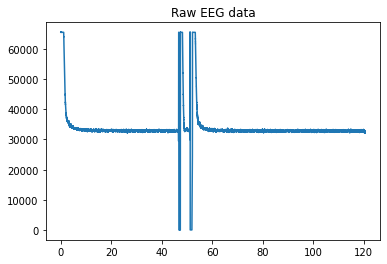

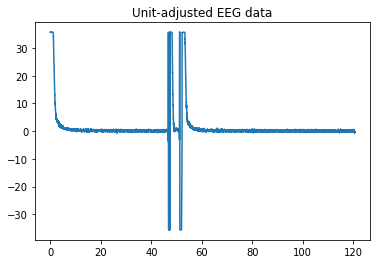

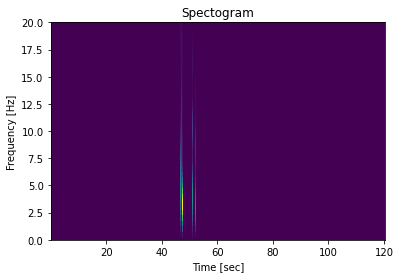

In [19]:
filename = "data/eyesopeneyesclose_leftear_nathan_11-22-21.txt"

# Set these based on the header json object in the .txt file
sampling_rate = 1000
resolution = 16 # header.resolution[0]
eeg_column = 2


data = loadtxt(filename)
time = bsnb.generate_time(data, sampling_rate)

eeg_data = data[:,eeg_column]

#print(eeg_data)

#signal_uv = (((array(eeg_data) / 2**resolution) - 0.5) * 3e6) / 40000

signal_uv = bsnb.raw_to_phy("EEG", "biosignalsplux", eeg_data, resolution, "uV")
time_uv = bsnb.generate_time(signal_uv, sampling_rate)

plt.title("Raw EEG data")
plt.plot(time, eeg_data)
plt.show()

plt.title("Unit-adjusted EEG data")
plt.plot(time_uv, signal_uv)
plt.show()


f, t, Sxx = spectrogram(signal_uv, fs = sampling_rate, nfft = 2000)

plt.title("Spectogram")
plt.pcolormesh(t, f, Sxx)
plt.ylim([0, 20])
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()
#print(data)